In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
# import nltk
# import ssl
# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download('punkt')
# nltk.download('stopwords')
# from nltk.corpus import stopwords
from gensim.models import KeyedVectors, Word2Vec

SPECIAL_CHARS = '[^A-Za-z0-9 ]+'

In [ ]:
def preprocess(text):
    tokenized = [word for sent in [re.sub(SPECIAL_CHARS, '', element).split(' ') for 
                                   element in nltk.sent_tokenize(text)] for word in sent]
    lowered = [word.lower() for word in tokenized]
    return lowered

In [ ]:
dataset = pd.read_csv('dataset.csv')

In [ ]:
ls = list()
for ix in range(dataset.shape[0]):
    content = list()
    for e in dataset.iloc[ix,4:9]:
        content.append(str(e))
    s = ','.join(content)
    ls.append(s)

In [ ]:
dataset['everything'] = ls

In [ ]:
description_texts = [preprocess(text) for text in dataset['everything'].tolist()]

In [ ]:
# # Take out the stopwords
# for i in range(len(description_texts)):
#     description_texts[i] = [word for word in description_texts[i] if word not in stopwords.words('english')]

# I use movie title as unique key. So I map out the title and the tokenised sentences

title_text = dict(zip(dataset['title'].tolist(), description_texts))

In [ ]:
model = Word2Vec(min_count=20,
                window=2,
                size=300,
                sample=6e-5,
                alpha=0.03,
                min_alpha=0.0007,
                negative=20,
                )

In [ ]:
def get_vectors(first_map, second_map):
    first_vec  = dict()
    for uid, content in first_map.items():
        temp = list()
        for element in content:
            try:
                temp.append(second_map[element])
            except KeyError:
                pass
        first_vec[uid] = np.mean(temp, axis=0)
    
    return first_vec


def get_most_similar(lookup_id):

    sim = list()
    
    lookup_map = title_vec
    subject_map = title_vec
#     else:
#         raise ValueError('Invalid value for parameter kind.')
        
    for uid, vec in lookup_map.items():
        thisSim = cosine_similarity(vec.reshape(1, -1), subject_map[lookup_id].reshape(1, -1))
        sim.append((uid, thisSim[0][0]))

    return sorted(sim, key=lambda x: x[1], reverse=True)

def top_10_similar(title):
    
    x = get_most_similar(title)[1:11]
#     for e in x:
# #         rating = dataset.loc[dataset['title']==e[0]]['rating_value'].values.tolist()[0]
# #         votes = dataset.loc[dataset['title']==e[0]]['votes'].values.tolist()[0]
# #         print(f"Movie title: {e[0]}\nScores: {rating}\nVotes: {votes}\nSimilarity: {e[1]}\n")
#         genres = test.loc[test['title']==e[0]['genres'].values.tolist()]
#         print(f"Movie title: {e[0]}\nGenres: {genres}\nSimilarity: {e[1]}\n")
    print(x)

In [ ]:
title_vec = get_vectors(title_text, model)

In [ ]:
top_10_similar('House of Cards')

# Test 6k dataset

In [ ]:
data6k = pd.read_csv('netflixMovieDb.csv')
data6k = data6k.append(pd.read_csv('netflixTvshowDb.csv')).append(pd.read_csv('dMoviesDb.csv')).append(pd.read_csv('dTvshowsDb.csv'))

In [ ]:
data6k.shape

In [ ]:
ls = list()
for ix in range(data6k.shape[0]):
    content = list()
    for e in data6k.iloc[ix,4:9]:
        content.append(str(e))
    s = ','.join(content)
    ls.append(s)
    
data6k['everything'] = ls

In [ ]:
description_texts = [preprocess(text) for text in data6k['everything'].tolist()]

In [ ]:
# Take out the stopwords
for i in range(len(description_texts)):
    description_texts[i] = [word for word in description_texts[i] if word not in stopwords.words('english')]

# I use movie title as unique key. So I map out the title and the tokenised sentences

title_text = dict(zip(data6k['title'].tolist(), description_texts))

In [ ]:
model = Word2Vec(description_texts, min_count=2)

In [ ]:
title_vec = get_vectors(title_text, model)

In [ ]:
top_10_similar('Ultraman')

In [ ]:
top_10_similar('House of Cards')

# Spacy test

In [59]:
import spacy
from spacy import displacy
from spacy.matcher import Matcher
import pandas as pd
pd.set_option('display.max_colwidth', None)
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import KeyedVectors
import re
import numpy as np

In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
net_originals = pd.read_csv('dataset.csv')

In [5]:
corpus = net_originals.description.values.tolist() #list of docs


In [8]:
def tokenise(doc):
    return [token.text for token in nlp(doc)]

In [9]:
token_corpus = [tokenise(doc) for doc in corpus]

In [14]:
title_text = dict(zip(net_originals['title'].str.lower().tolist(), token_corpus))
# lower the title (easy for search)

In [18]:
path = "GoogleNews-vectors-negative300.bin"
w2v = KeyedVectors.load_word2vec_format(path, binary=True)

In [31]:
def get_vectors(first_map, second_map):
    first_vec  = dict()
    for uid, content in first_map.items():
        temp = list()
        for element in content:
            try:
                temp.append(second_map[element])
            except KeyError:
                pass
        first_vec[uid] = np.mean(temp, axis=0)
    
    return first_vec

In [32]:
def get_most_similar(lookup_id, title_vec):

    sim = list()
    lookup_map = title_vec
    subject_map = title_vec 
        
    for uid, vec in lookup_map.items():
        thisSim = cosine_similarity(vec.reshape(1, -1), subject_map[lookup_id].reshape(1, -1))
        sim.append((uid, thisSim[0][0]))

    return sorted(sim, key=lambda x: x[1], reverse=True)

In [37]:
title_vec = get_vectors(title_text, w2v)

In [42]:
get_most_similar('house of cards', title_vec)[1:11]

[('orange is the new black', 0.693176),
 ('girlboss', 0.6802441),
 ('the crown', 0.66773325),
 ("john leguizamo's latin history for morons", 0.6632719),
 ('derek', 0.6610303),
 ('cuba and the cameraman', 0.6598381),
 ('haters back off', 0.6597925),
 ('pacific heat', 0.6597719),
 ('wanda sykes: not normal', 0.6593898),
 ('bomb scared', 0.6556132)]

In [43]:
get_most_similar('black mirror', title_vec)[1:11]

[('til death do us part', 0.77249855),
 ('marc maron: too real', 0.7058834),
 ('easy', 0.69845235),
 ('creeped out', 0.696932),
 ('rapture', 0.6834707),
 ('black mirror: bandersnatch', 0.6818516),
 ('comedians of the world', 0.67625797),
 ('i lost my body', 0.6690748),
 ("bill burr: i'm sorry you feel that way", 0.66618645),
 ('the adventures of puss in boots', 0.6503126)]

似乎是沒有很準 現在來試試看 6k dataset

## same approach but with 6k dataset

In [44]:
data6k = pd.read_csv('netflixMovieDb.csv')
data6k = data6k.append(pd.read_csv('netflixTvshowDb.csv')).append(pd.read_csv('dMoviesDb.csv')).append(pd.read_csv('dTvshowsDb.csv'))

In [49]:
data6k.columns

Index(['title', 'type', 'release_year', 'rating', 'runtime', 'description',
       'genres', 'cast', 'director', 'country', 'imdb_link', 'date_added'],
      dtype='object')

In [50]:
ls = list()
for ix in range(data6k.shape[0]):
    content = list()
    for e in data6k.iloc[ix,5:9]:
        content.append(str(e))
    s = ','.join(content)
    ls.append(s)
    
data6k['everything'] = ls

In [53]:
corpus6k = data6k.description.values.tolist() #list of docs
token_corpus6k = [tokenise(doc) for doc in corpus6k]
title_text = dict(zip(data6k['title'].str.lower().tolist(), token_corpus6k))
# lower the title (easy for search)

In [54]:
title_vec6k = get_vectors(title_text, w2v)

In [68]:
from pprint import pprint

In [69]:
title = "house of cards"
sim = get_most_similar(title, title_vec6k)[1:11]
pprint(sim)

[('newsies: the broadway musical', 0.707976),
 ("marvel studios' captain america: the winter soldier", 0.70431525),
 ("blackbeard's ghost", 0.6945638),
 ('orange is the new black', 0.693176),
 ('the even stevens movie', 0.68901473),
 ('the great muppet caper', 0.6858609),
 ('the rocketeer', 0.6857825),
 ('alpha dog', 0.6855821),
 ('atlantis rising', 0.6847112),
 ("a kid in king arthur's court", 0.68392557)]


In [82]:
def sim_title_description(title, dataset):
    """Return the title description"""
    filt = dataset['title'].str.lower() == title
    return dataset.loc[filt]['description'].values.tolist()[0]

In [131]:
def dscp_comparison(org, dataset, vec):
    
    org = org.lower()
    org_dscp = dataset.loc[dataset['title'].str.lower() == org]['description'].values.tolist()[0]
    print(f"The input title name is '{org}'\n")
    print(org_dscp, '\n')
    sim = get_most_similar(org, vec)[1:11]
    
    for i in range(len(sim)):
        title = sim[i][0]
        print(f"The most similiar No.{i+1} is '{title}'\n")
        print(sim_title_description(title, dataset),'\n')

In [91]:
title = "Star Wars: The Rise of Skywalker (Episode IX)".lower()
dscp_comparison(title, data6k, title_vec6k)

The input title name is 'star wars: the rise of skywalker (episode ix)'

Lucasfilm and director J.J. Abrams join forces once more to take viewers on an epic journey to a galaxy far, far away with STAR WARS: THE RISE OF SKYWALKER. Experience the riveting conclusion of the landmark Skywalker saga, in which new legends will be born – and the final battle for freedom is yet to come. Some flashing lights sequences or patterns may affect photosensitive viewers. 

The most similiar No.1 is 'marvel studios' captain marvel'

Marvel Studios’ Captain Marvel takes you on a spectacular adventure from the 1990s, tracing the path of Carol Danvers (Brie Larson) as she becomes one of the most powerful heroes in the universe. When a galactic war reaches Earth, she meets young agent Nick Fury (Samuel L. Jackson) at the center of a maelstrom, leading to her ultimate destiny as an Avenger! Some flashing lights sequences or patterns may affect photosensitive viewers. 

The most similiar No.2 is 'star wars: 

In [81]:
title = ("Star Wars: The Rise of Skywalker (Episode IX)").lower()
sim = get_most_similar(title, title_vec6k)[1:11]
pprint(sim)

[("marvel studios' captain marvel", 0.84679013),
 ('star wars: the last jedi (episode viii)', 0.84489995),
 ("marvel studios' guardians of the galaxy vol. 2", 0.841521),
 ('rogue one: a star wars story', 0.83434486),
 ('star wars: the force awakens (episode vii)', 0.83128947),
 ('empire of dreams: the story of the star wars trilogy', 0.82583207),
 ('the incredibles', 0.8181932),
 ("sanjay's super team", 0.81763077),
 ("marvel studios' doctor strange", 0.81403),
 ("marvel studios' guardians of the galaxy", 0.8101623)]


### 看起來迪士尼電影的預測蠻準的

現在來試試看把genres也加進去會如何

In [114]:
corpus6k_everything = data6k.everything.values.tolist() #list of docs
token_corpus6k_eve = [tokenise(doc) for doc in corpus6k_everything]
title_text_eve = dict(zip(data6k['title'].str.lower().tolist(), token_corpus6k_eve))
# lower the title (easy for search)

In [117]:
title_vec6k_eve = get_vectors(title_text_eve, w2v)

In [118]:
title = ("Star Wars: The Rise of Skywalker (Episode IX)").lower()
sim = get_most_similar(title, title_vec6k_eve)[1:11]
pprint(sim)

[('star wars: the last jedi (episode viii)', 0.8995548),
 ('star wars: the force awakens (episode vii)', 0.88572097),
 ("marvel studios' captain marvel", 0.8731832),
 ("marvel studios' guardians of the galaxy vol. 2", 0.86643857),
 ('rogue one: a star wars story', 0.863647),
 ('the adventures of huck finn', 0.84977454),
 ('20,000 leagues under the sea', 0.84927744),
 ('empire of dreams: the story of the star wars trilogy', 0.84775823),
 ('the incredibles', 0.84645766),
 ('one strange rock', 0.8462903)]


In [119]:
title = ("house of cards").lower()
sim = get_most_similar(title, title_vec6k_eve)[1:11]
pprint(sim)

[('american horror story', 0.9274517),
 ('black mirror', 0.9248233),
 ('love, death & robots', 0.92430514),
 ('creeped out', 0.92122513),
 ('twin peaks', 0.9199591),
 ('waco', 0.91844386),
 ('arthur christmas', 0.9175664),
 ("dolly parton's heartstrings", 0.9167512),
 ('wet hot american summer', 0.9163462),
 ('walt disney animation studios short films collection', 0.91417134)]


In [120]:
title = ("ONE PIECE").lower()
sim = get_most_similar(title, title_vec6k_eve)[1:11]
pprint(sim)

[('durarara!!', 0.8925926),
 ('granblue fantasy the animation', 0.8924352),
 ('b: the beginning', 0.88769287),
 ('magi: adventure of sinbad', 0.8874479),
 ('magi: the labyrinth of magic', 0.88565147),
 ('k', 0.88212115),
 ('lost song', 0.88210416),
 ('angel beats!', 0.8809499),
 ('cannon busters', 0.87996674),
 ('attack on titan', 0.87947)]


In [121]:
title = ("our planet").lower()
sim = get_most_similar(title, title_vec6k_eve)[1:11]
pprint(sim)

[('moving art', 0.8199095),
 ('secrets of life', 0.813776),
 ('secrets of wild india', 0.8125536),
 ('the universe: ancient mysteries solved', 0.8084961),
 ('disneynature crimson wing', 0.8030727),
 ('72 cutest animals', 0.79790276),
 ('earth live', 0.7972078),
 ('giants of the deep blue', 0.7957635),
 ('hostile planet', 0.79496723),
 ('sacred planet', 0.79335016)]


In [122]:
title = ("Avatar: The Last Airbender").lower()
sim = get_most_similar(title, title_vec6k_eve)[1:11]
pprint(sim)

[('marvel rising: playing with fire', 0.83469415),
 ('the dragon prince', 0.83441544),
 ('bakugan: battle planet', 0.8274182),
 ('the last airbender', 0.8255279),
 ('neo yokio', 0.82417274),
 ('dreamworks kung fu panda awesome secrets', 0.8228989),
 ('another life', 0.81867677),
 ('the shannara chronicles', 0.8174548),
 ('the i-land', 0.81607234),
 ('3below: tales of arcadia', 0.8159124)]


In [123]:
title = ("One-punch man").lower()
sim = get_most_similar(title, title_vec6k_eve)[1:11]
pprint(sim)

[('k', 0.9238441),
 ('the disastrous life of saiki k.', 0.9106667),
 ('ajin: demi-human', 0.90990305),
 ('durarara!!', 0.9078226),
 ('carole & tuesday', 0.9075865),
 ('akame ga kill!', 0.90647966),
 ('magi: adventure of sinbad', 0.904791),
 ('good morning call', 0.90460104),
 ('children of the whales', 0.90279055),
 ('the naked director', 0.90253824)]


In [124]:
title = ("world war II in colour").lower()
sim = get_most_similar(title, title_vec6k_eve)[1:11]
pprint(sim)

[('greatest events of wwii in colour', 0.8905311),
 ('churchill’s secret agents: the new recruits', 0.81478024),
 ('age of tanks', 0.80853164),
 ('los tiempos de pablo escobar', 0.79139763),
 ('the royal house of windsor', 0.78380305),
 ('timeline', 0.77948886),
 ('club friday the series 8', 0.77656305),
 ('james acaster: repertoire', 0.7763171),
 ('secrets of great british castles', 0.7762208),
 ('murder maps', 0.7740204)]


In [132]:
title = ("chef's table").lower()
print(dscp_comparison(title, data6k, title_vec6k_eve))

The input title name is 'chef's table'

In this Emmy-nominated docuseries, find out what's inside the kitchens and minds of the international culinary stars who are redefining gourmet food. 

The most similiar No.1 is 'the big family cooking showdown'

In this unscripted series, families passionate about food serve up their most delicious dishes for the chance to be crowned Britain's best home cooks. 

The most similiar No.2 is 'the chefs' line'

Home cooks face off against trained chefs to see if passion can beat profession in the kitchen in this reality competition show. 

The most similiar No.3 is 'taco chronicles'

Many of the most popular taco styles have long, rich, little-known histories. Explore some of them in this eye-opening, mouth-watering food adventure. 

The most similiar No.4 is 'cooking on high'

In the first-ever competitive cannabis cooking show, two chefs prepare mouthwatering marijuana-infused dishes for a panel of very chill celeb judges. 

The most similiar No.5 

# 如果用Netflix all-info 會如何？

In [137]:
net_originals.columns

Index(['title', 'type', 'release_year', 'rating', 'runtime', 'description',
       'genres', 'cast', 'director', 'country', 'imdb_link', 'date_added',
       'rating_value', 'votes'],
      dtype='object')

In [142]:
ls = list()
for ix in range(net_originals.shape[0]):
    content = list()
    for e in net_originals.iloc[ix,5:9]:
        content.append(str(e))
    s = ','.join(content)
    ls.append(s)
    
net_originals['everything'] = ls

In [144]:
corpus_netall= net_originals.everything.values.tolist() #list of docs
token_corpus_netall = [tokenise(doc) for doc in corpus_netall]
title_text_netall = dict(zip(net_originals['title'].str.lower().tolist(), token_corpus_netall))
# lower the title (easy for search)

In [145]:
title_vec6k_netall = get_vectors(title_text_netall, w2v)

In [147]:
title = ("marvel's daredevil").lower()
sim = get_most_similar(title, title_vec6k_netall)[1:11]
pprint(sim)

[("marvel's the defenders", 0.9201804),
 ('skylanders academy', 0.90434873),
 ('love, death & robots', 0.9031284),
 ('the dark crystal: age of resistance', 0.8954758),
 ('kulipari: dream walker', 0.89274454),
 ('watership down', 0.8926588),
 ('trollhunters', 0.88995475),
 ('peaky blinders', 0.8897299),
 ("marvel's the punisher", 0.88698035),
 ("michael bolton's big, sexy valentine's day special", 0.885046)]


In [148]:
title = ("marvel's daredevil").lower()
print(dscp_comparison(title, data6k, title_vec6k_netall))

The input title name is 'marvel's daredevil'

Blinded as a young boy, Matt Murdock fights injustice by day as a lawyer and by night as the Super Hero Daredevil in Hell's Kitchen, New York City. 

The most similiar No.1 is 'marvel's the defenders'

Daredevil, Jessica Jones, Luke Cage and Iron Fist join forces to take on common enemies as a sinister conspiracy threatens New York City. 

The most similiar No.2 is 'skylanders academy'

Travel the vast Skylander universe in this animated series as a ragtag group of academy graduates build trust and heart in their fight against evil. 

The most similiar No.3 is 'love, death & robots'

Terrifying creatures, wicked surprises and dark comedy converge in this NSFW anthology of animated stories presented by Tim Miller and David Fincher. 

The most similiar No.4 is 'the dark crystal: age of resistance'

As power-hungry overlords drain life from the planet Thra, a group of brave Gelfling unite on a quest to save their world and fight off the darkne

# Test out wikipedia

In [149]:
import wikipedia

Not good at all Don't use

# Display scatterplot

In [111]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA


def display_pca_scatterplot(titles, vec):
    
    title_vectors = np.array([vec[title] for title in titles])
    twodim = PCA().fit_transform(title_vectors)[:,:2]
    plt.figure(figsize=(12,12))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for title, (x,y) in zip(titles, twodim):
        plt.text(x+0.05, y+0.05, title)

In [104]:
titles = np.random.choice(data6k['title'].values, size = 10).tolist()
titles = [title.lower() for title in titles]

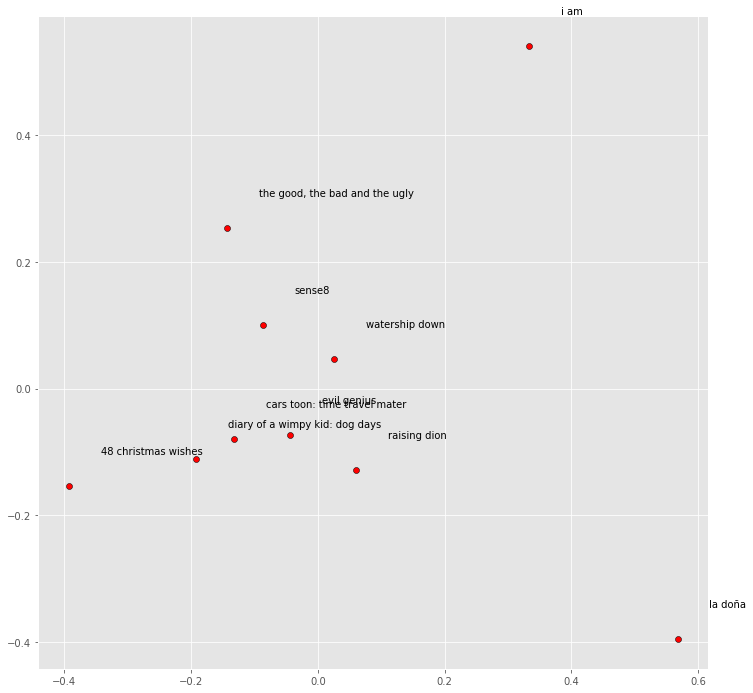

In [112]:
display_pca_scatterplot(titles, title_vec6k)